In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
heart_df = pd.read_csv(r'raw_merged_heart_dataset.csv')

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB


In [6]:
##Creating a new column to simulate countries over the world with high rate of heart disease
high_heart_disease_countries = ["United States", "Russia", "India", "China", "Brazil", "Ukraine", "Germany", "United Kingdom", "Mexico", "South Africa"]

# As 2nd column
heart_df.insert(1, 'Country', np.random.choice(high_heart_disease_countries, size=len(heart_df)))


In [7]:
# Each sublist contains 3 states/regions with high heart disease burden for the corresponding country
high_heart_disease_states = [
    ["Alabama", "Mississippi", "West Virginia"],         # United States
    ["Moscow Oblast", "Saint Petersburg", "Krasnodar"],  # Russia
    ["Kerala", "Tamil Nadu", "Goa"],                     # India
    ["Beijing", "Shanghai", "Guangdong"],               # China
    ["São Paulo", "Rio de Janeiro", "Bahia"],           # Brazil
    ["Kyiv", "Kharkiv", "Dnipro"],                      # Ukraine
    ["Bavaria", "North Rhine-Westphalia", "Saxony"],    # Germany
    ["England", "Scotland", "Wales"],                   # United Kingdom
    ["Mexico City", "Jalisco", "Nuevo León"],           # Mexico
    ["Gauteng", "KwaZulu-Natal", "Eastern Cape"]        # South Africa
]


In [8]:
#Function to assign Random states based on the countries defined earlier
def pick_state(Country):
    if Country in high_heart_disease_countries:
        country_index = high_heart_disease_countries.index(Country)
        return np.random.choice(high_heart_disease_states[country_index])
    else:
        np.nan

In [9]:
heart_df.insert(2,'State', heart_df['Country'].apply(pick_state))

In [10]:
heart_df.head()

,age,Country,State,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,Ukraine,Kyiv,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,United States,West Virginia,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Brazil,Bahia,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,United Kingdom,Wales,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,South Africa,Gauteng,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
heart_df.groupby(['Country','State'])[['State']].count()

State
Country        State                        
Brazil         Bahia                      75
               Rio de Janeiro             63
               São Paulo                  67
China          Beijing                    59
               Guangdong                  68
               Shanghai                   77
Germany        Bavaria                    76
               North Rhine-Westphalia     79
               Saxony                     47
India          Goa                        92
               Kerala                     74
               Tamil Nadu                 81
Mexico         Jalisco                    73
               Mexico City                98
               Nuevo León                 66
Russia         Krasnodar                  79
               Moscow Oblast              66
               Saint Petersburg           75
South Africa   Eastern Cape               79
               Gauteng                    66
               KwaZulu-Natal              55
Ukraine        Dnipro                     70
               Kharkiv                    75
               Kyiv                       78
United Kingdom England                    72
               Scotland                   79
               Wales                      57
United States  Alabama                    82
               Mississippi                69
               West Virginia              84

In [12]:
#No nullvalues here 
heart_df.isnull().sum().sum()

np.int64(0)

In [13]:
heart_df.corr(numeric_only=True)

,age,sex,cp,oldpeak,target
age,1.000000,-0.094249,-0.083587,0.228801,-0.094863
sex,-0.094249,1.000000,0.004036,0.090276,-0.139418
cp,-0.083587,0.004036,1.000000,-0.098740,0.343394
oldpeak,0.228801,0.090276,-0.098740,1.000000,-0.206794
target,-0.094863,-0.139418,0.343394,-0.206794,1.000000


In [14]:
heart_df.shape

(2181, 16)

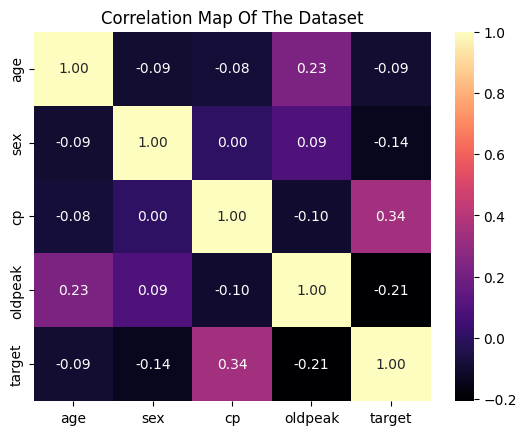

In [15]:
sns.heatmap(data=heart_df.corr(numeric_only=True),cmap='magma', annot=True , fmt='.2f')
plt.title('Correlation Map Of The Dataset')
plt.show()

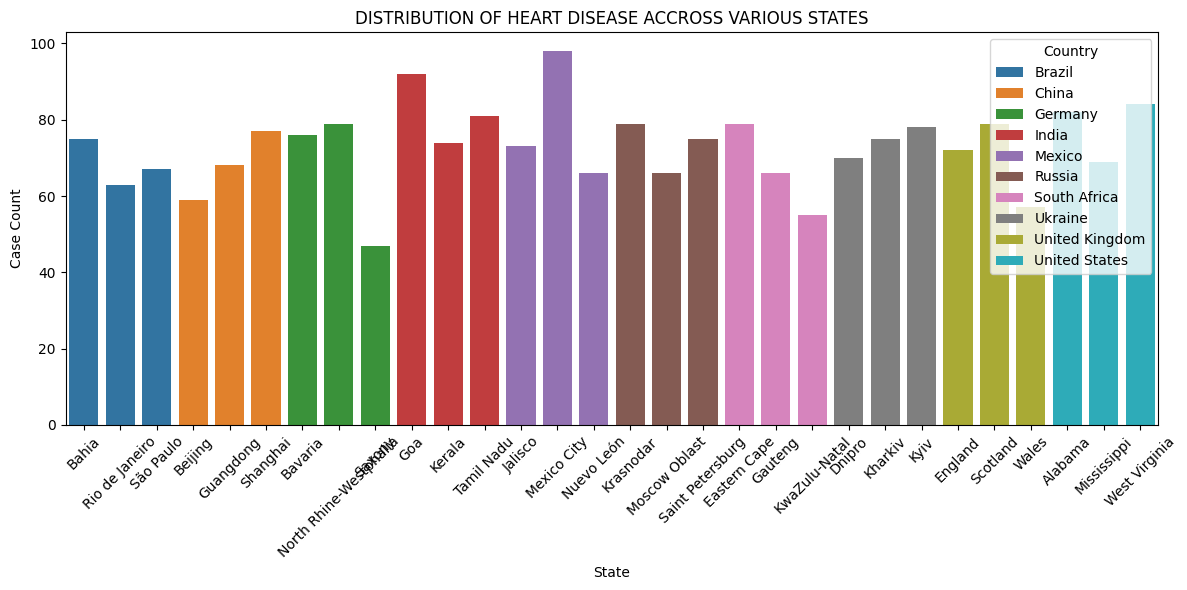

In [16]:
#Checking distribution among states 
state_count = heart_df.groupby(['Country','State'])['State'].count().reset_index(name='Case Count')




plt.figure(figsize=(12,6))
sns.barplot(data=state_count, x ='State' , y='Case Count', hue='Country')
plt.title("DISTRIBUTION OF HEART DISEASE ACCROSS VARIOUS STATES")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [17]:
state_count.head()

,Country,State,Case Count
0,Brazil,Bahia,75
1,Brazil,Rio de Janeiro,63
2,Brazil,São Paulo,67
3,China,Beijing,59
4,China,Guangdong,68


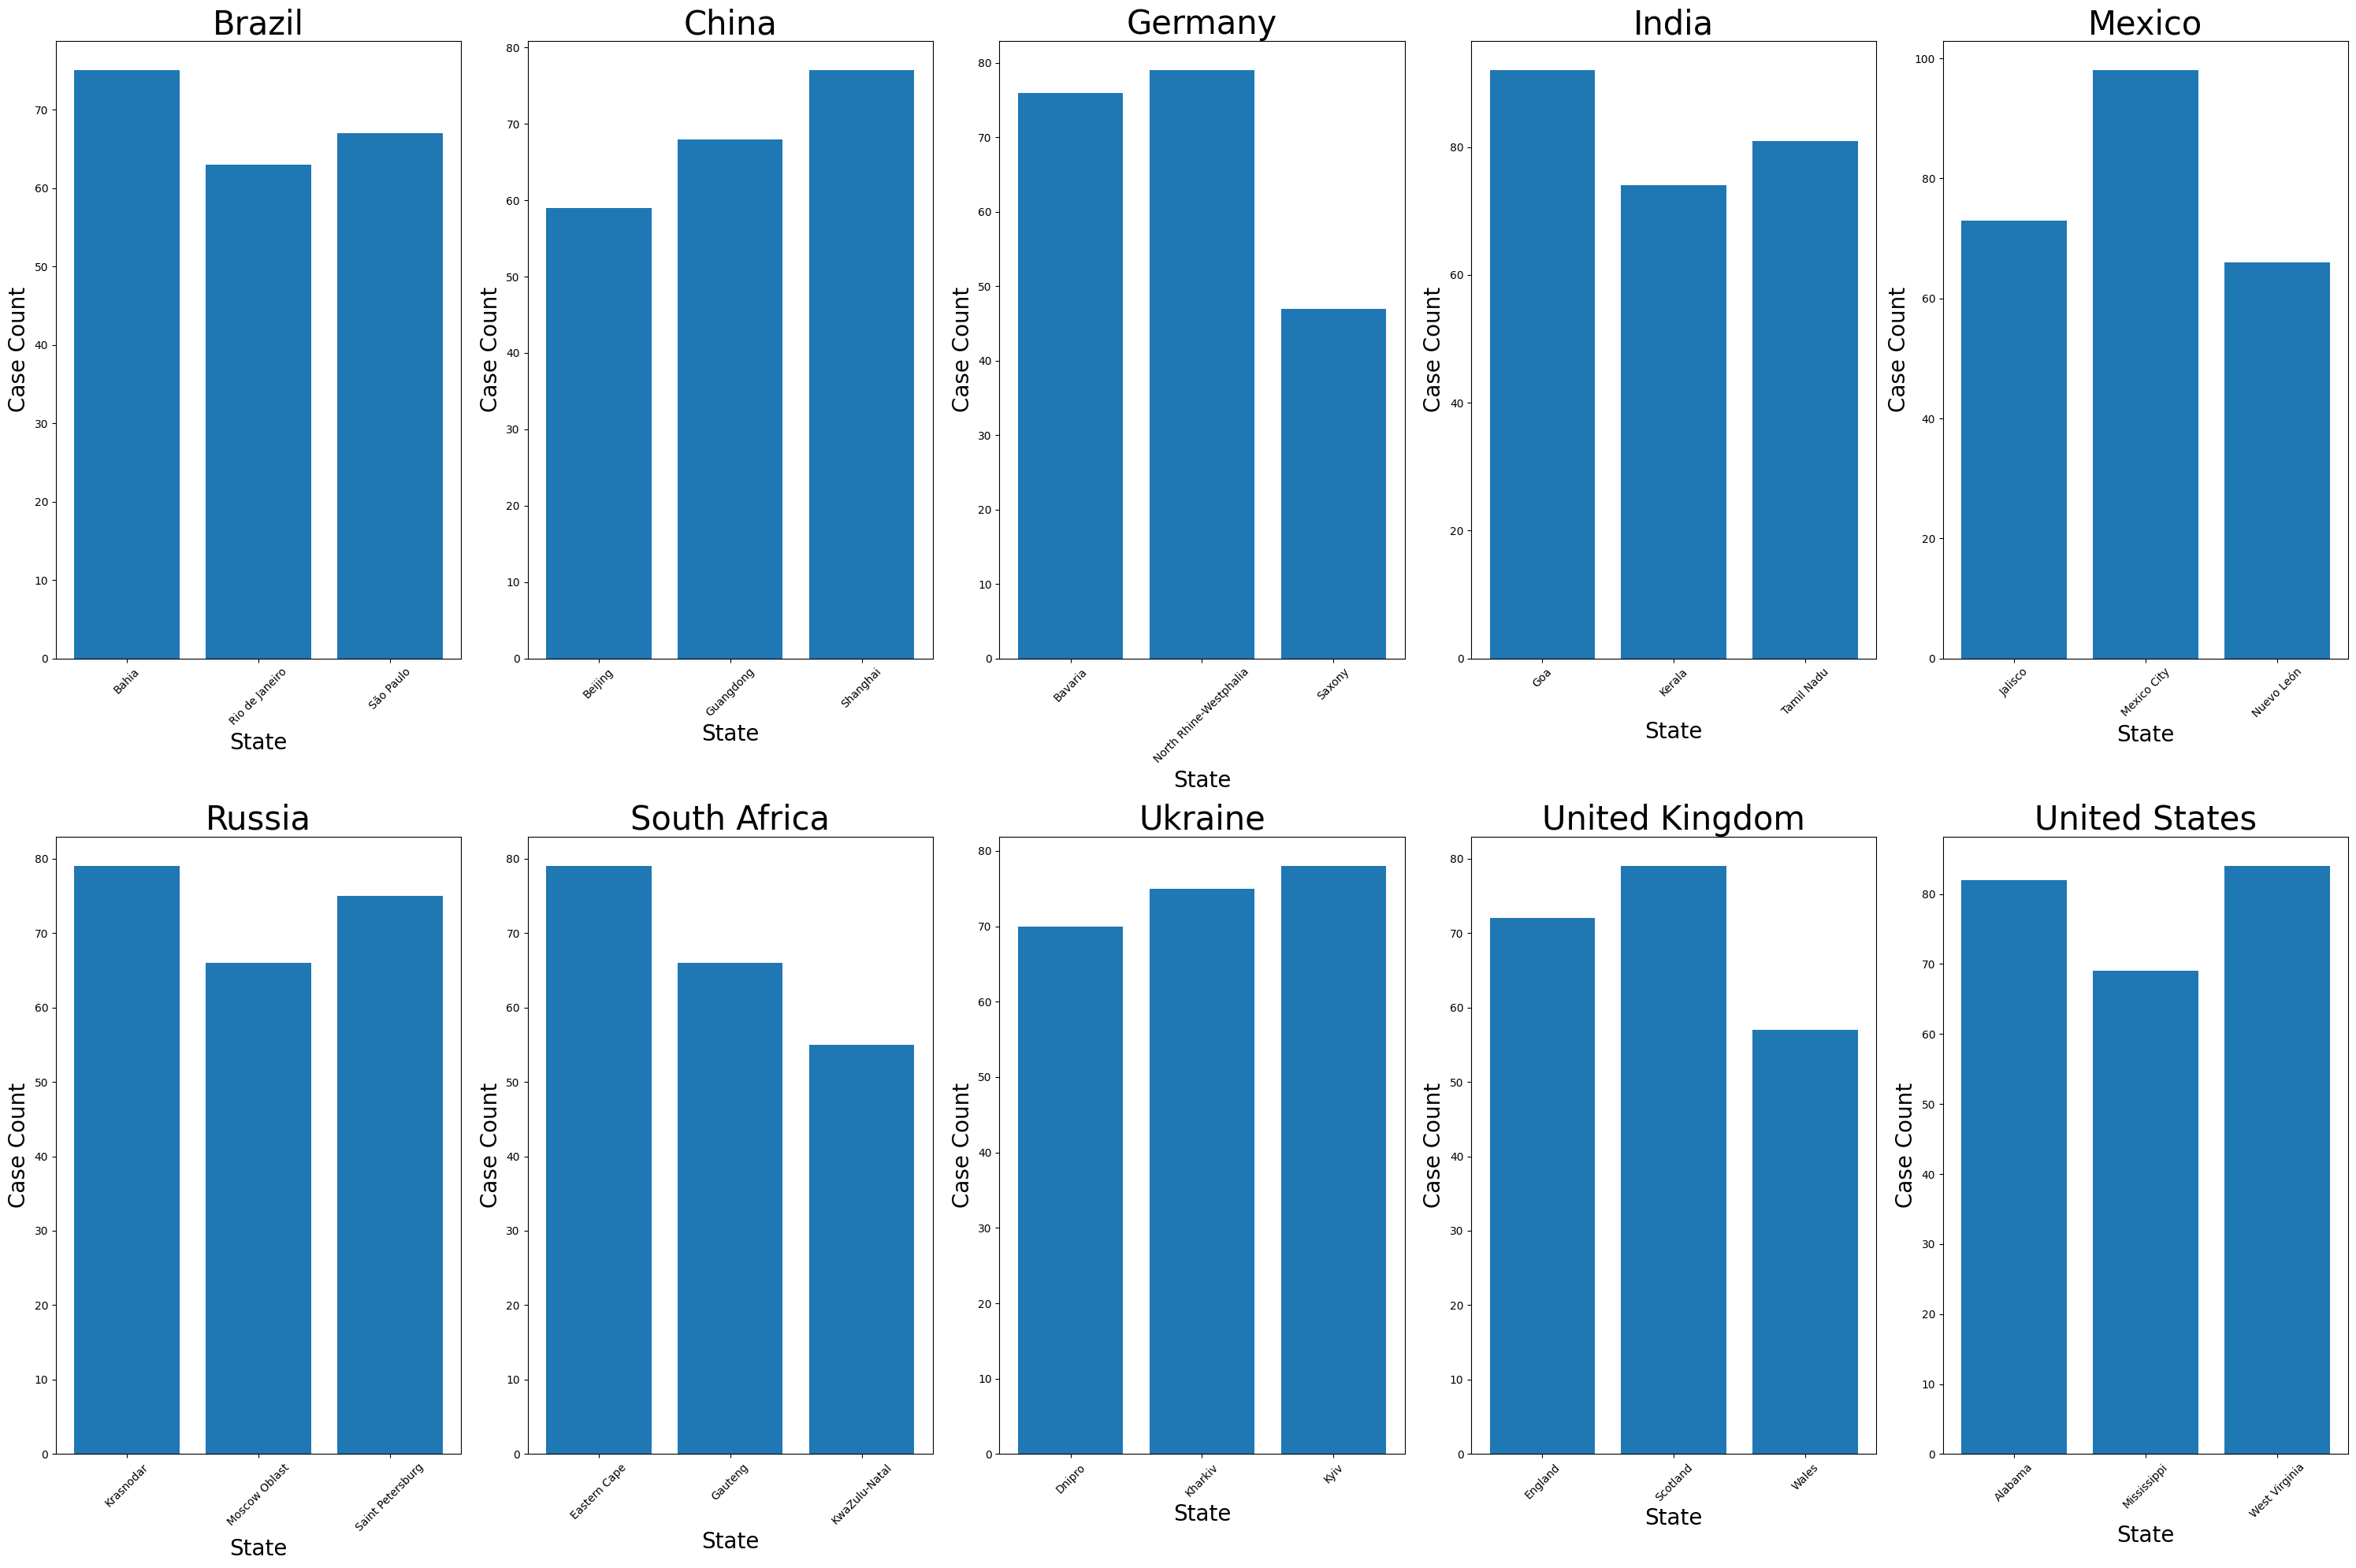

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(30, 20))

countries = state_count['Country'].unique()

for ax, country in zip(axes.flat, countries):
    data = state_count.loc[state_count['Country'] == country][['State', 'Case Count']]
    ax.bar(data['State'], data['Case Count'])
    ax.set_title(country, fontsize=30)
    ax.set_xlabel('State', fontsize=20)
    ax.set_ylabel('Case Count', fontsize=20)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
